# Batsman runs prediction project using Multiple Linear Regression

## importing required libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load the dataset

In [22]:
df=pd.read_csv("t20.csv")

In [23]:
df.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15
0,0,V Kohli (INDIA),2010-2019,75,70,20,2633,94*,52.66,1907,138.07,0,24,2,247,71,NaN
1,1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120,NaN
2,2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113,NaN
3,3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61,NaN
4,4,BB McCullum (NZ),2005-2015,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2006 non-null   int64  
 1   Player       2006 non-null   object 
 2   Span         2006 non-null   object 
 3   Mat          2006 non-null   int64  
 4   Inns         2006 non-null   object 
 5   NO           2006 non-null   object 
 6   Runs         2006 non-null   object 
 7   HS           2006 non-null   object 
 8   Ave          2006 non-null   object 
 9   BF           2006 non-null   object 
 10  SR           2006 non-null   object 
 11  100          2006 non-null   object 
 12  50           2006 non-null   object 
 13  0            2006 non-null   object 
 14  4s           2006 non-null   object 
 15  6s           2006 non-null   object 
 16  Unnamed: 15  0 non-null      float64
dtypes: float64(1), int64(2), object(14)
memory usage: 266.6+ KB


In [25]:
#checking NULL values
df.isna().sum()

Unnamed: 0        0
Player            0
Span              0
Mat               0
Inns              0
NO                0
Runs              0
HS                0
Ave               0
BF                0
SR                0
100               0
50                0
0                 0
4s                0
6s                0
Unnamed: 15    2006
dtype: int64

In [26]:
df.drop(columns=['Unnamed: 0','Unnamed: 15','Player'],inplace=True)

In [27]:
df.columns

Index(['Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', '4s', '6s'],
      dtype='object')

In [28]:
df[['Start', 'End']] = df['Span'].str.split('-', expand=True)
df['Start'] = pd.to_numeric(df['Start'], errors='coerce')
df['End'] = pd.to_numeric(df['End'], errors='coerce')
df['Span'] = df['End'] - df['Start']

In [29]:
df.drop(df[['Start', 'End']],axis=1,inplace=True)

In [30]:
df.head()

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,9,75,70,20,2633,94*,52.66,1907,138.07,0,24,2,247,71
1,12,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120
2,10,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113
3,13,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61
4,10,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91


In [31]:
df.HS.head(11)

0      94*
1      118
2      105
3       75
4      123
5     100*
6       91
7     118*
8      96*
9       91
10      86
Name: HS, dtype: object

In [32]:
df.HS.tail()

2001    -
2002    -
2003    -
2004    -
2005    -
Name: HS, dtype: object

In [33]:
#removing * and - in HS (high score)
df['HS'] = df['HS'].astype(str).str.replace('*', '', regex=False)
df['HS'] = df['HS'].replace('-', np.nan)

In [34]:
df.HS.tail()

2001    NaN
2002    NaN
2003    NaN
2004    NaN
2005    NaN
Name: HS, dtype: object

In [35]:
df.dropna(subset=['HS'], inplace=True)

In [36]:
df.shape

(1854, 14)

In [37]:
df.dtypes

Span     int64
Mat      int64
Inns    object
NO      object
Runs    object
HS      object
Ave     object
BF      object
SR      object
100     object
50      object
0       object
4s      object
6s      object
dtype: object

In [38]:
#converting to numerical values
columns=['Inns','NO','Runs','HS','Ave','BF','SR','100','50','0','4s','6s']
for col in columns:
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [39]:
df.dtypes

Span      int64
Mat       int64
Inns      int64
NO        int64
Runs      int64
HS        int64
Ave     float64
BF        int64
SR      float64
100       int64
50        int64
0         int64
4s        int64
6s        int64
dtype: object

In [40]:
df.describe()

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1678.000000,1854.000000,1831.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,2.018339,11.981661,8.881877,1.902913,144.573894,27.816073,15.470024,121.686084,96.410087,0.029666,0.571197,0.816613,12.359223,4.988673
std,3.104701,15.274276,13.162506,3.028247,305.231238,26.948876,12.695079,236.107498,42.517417,0.219611,1.798258,1.292522,28.259788,12.004334
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,2.000000,0.000000,9.000000,7.000000,6.500000,12.000000,70.890000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,4.000000,1.000000,37.000000,19.000000,13.320000,39.000000,100.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,3.000000,14.000000,10.000000,2.000000,123.000000,41.000000,21.310000,112.750000,122.300000,0.000000,0.000000,1.000000,10.000000,4.000000
max,13.000000,111.000000,104.000000,42.000000,2633.000000,172.000000,126.000000,1907.000000,400.000000,4.000000,24.000000,10.000000,247.000000,120.000000


In [41]:
df.isna().sum()

Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave     176
BF        0
SR       23
100       0
50        0
0         0
4s        0
6s        0
dtype: int64

In [42]:
df.dropna(subset=['Ave', 'SR'], inplace=True)

In [43]:
df.shape

(1672, 14)

## Data visualization 

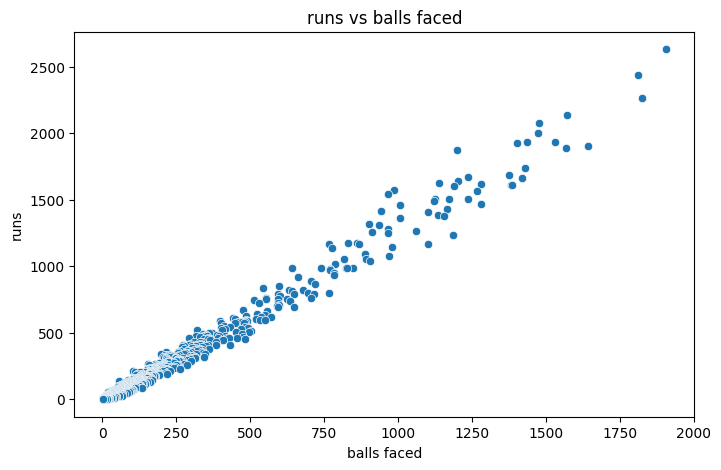

In [44]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='BF', y='Runs')
plt.xlabel('balls faced')
plt.ylabel('runs')
plt.title('runs vs balls faced')
plt.show()

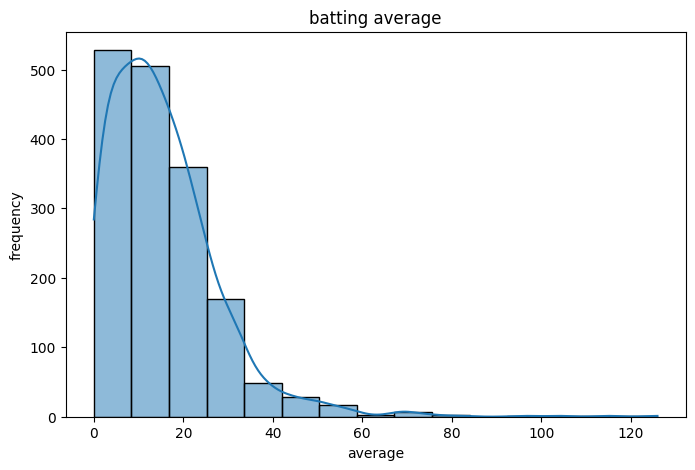

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Ave'], kde=True, bins=15)
plt.title('batting average')
plt.xlabel('average')
plt.ylabel('frequency')
plt.show()

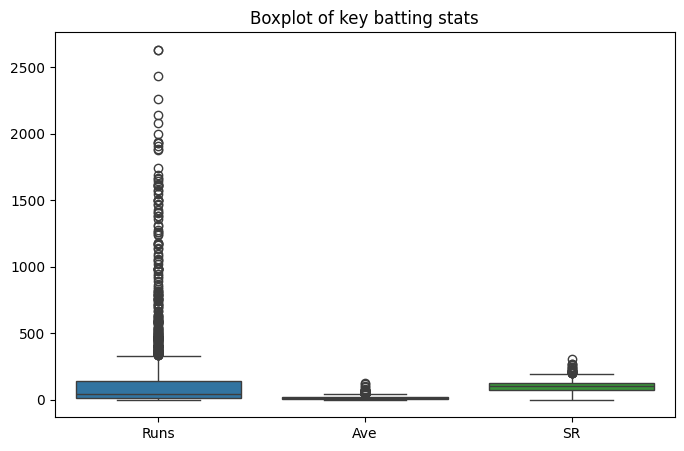

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Runs', 'Ave', 'SR']])
plt.title("Boxplot of key batting stats")
plt.show()

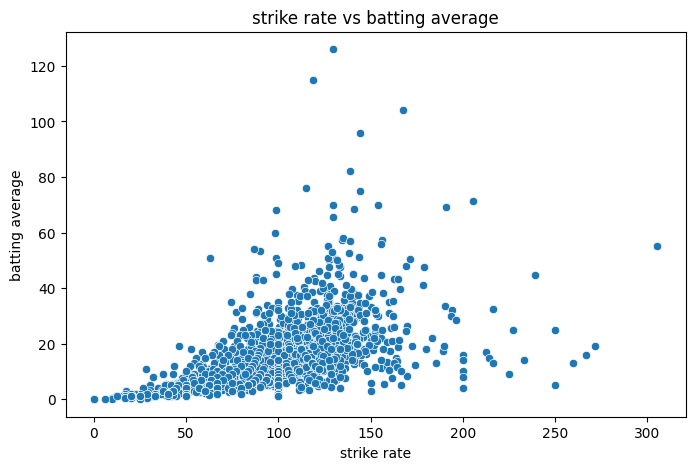

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='SR', y='Ave')
plt.title('strike rate vs batting average')
plt.xlabel('strike rate')
plt.ylabel('batting average')
plt.show()

## Splitting the dataset

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df[['BF', '4s', '6s', 'Inns', 'SR']]
y = df['Runs']

## Data preprocessing

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# Training the model

## Using Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the model
rf = RandomForestRegressor(random_state=42)
#Train the model
rf.fit(X_train_scale, y_train)

RandomForestRegressor(random_state=42)

## Predictions and Evaluation

In [51]:
y_pred = rf.predict(X_test_scale)
print("R2 Score (Basic RF):", r2_score(y_test, y_pred))
print("MSE (Basic RF):", mean_squared_error(y_test, y_pred))

R2 Score (Basic RF): 0.9931420380454229
MSE (Basic RF): 513.2894611940297


In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=2)

# Train the model using grid search
grid_search.fit(X_train_scale, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [53]:

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate the model
y_pred = best_rf.predict(X_test_scale)
print("R2 Score (Tuned RF):", r2_score(y_test, y_pred))
print("MSE (Tuned RF):", mean_squared_error(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
R2 Score (Tuned RF): 0.9929652641960263
MSE (Tuned RF): 526.5202365338376


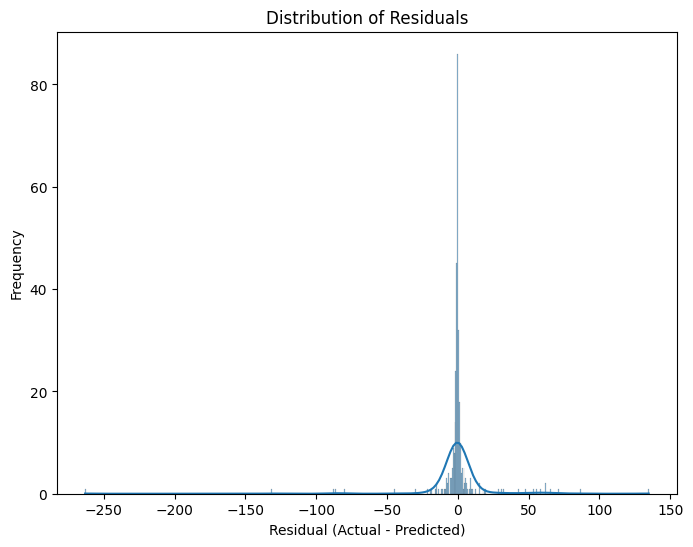

In [55]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


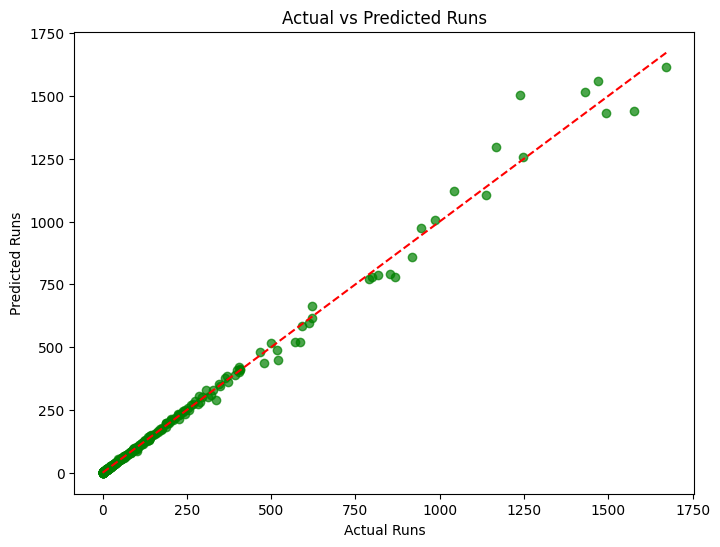

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs')
plt.show()

## Using Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scale,y_train)

LinearRegression()

## Model evaluation

In [58]:
lr.score(X_test_scale,y_test)

0.9967224370867684

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test_scale)
print("R2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.9967224370867684
MSE: 245.3117286017182
RMSE: 15.66243048194367


In [60]:
X_test

,BF,4s,6s,Inns,SR
438,101,6,6,4,129.70
570,115,6,1,21,81.73
567,80,7,4,11,117.50
534,71,9,4,12,142.25
1766,3,0,0,2,0.00
...,...,...,...,...,...
1470,11,0,0,1,63.63
1257,23,0,0,3,65.21
163,356,47,7,22,114.60
513,108,14,1,8,99.07


In [61]:
y_test

438     131
570      94
567      94
534     101
1766      0
       ... 
1470      7
1257     15
163     408
513     107
1285     13
Name: Runs, Length: 335, dtype: int64

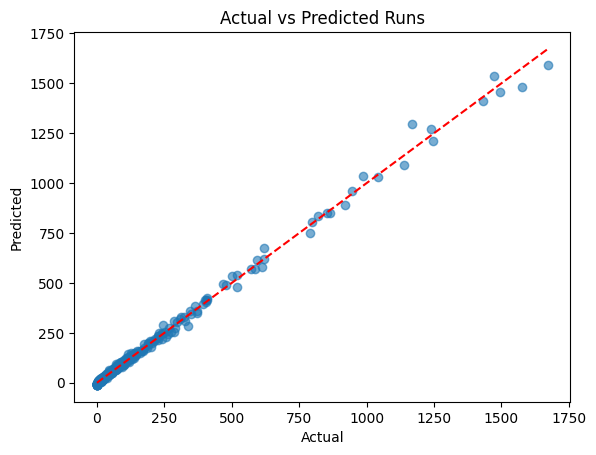

In [63]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Runs")
plt.show()

## saving the model

In [64]:
import joblib
joblib.dump(rf,'C:/Users/HP/mlprojects/cricket/runs_model.pkl')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler,'C:/Users/HP/mlprojects/cricket/runs_scaler.pkl')

['C:/Users/HP/mlprojects/cricket/runs_scaler.pkl']